# Geometry #3
Visualize the influence of water table

## Initialization

In [1]:
# Import pyKasso and other useful packages
import pykasso as pk
import numpy as np

In [2]:
# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0' : 0,
    'y0' : 0,
    'z0' : 0,
    'nx' : 100,
    'ny' : 50,
    'nz' : 50,
    'dx' : 10,
    'dy' : 10,
    'dz' : 10
}

# Create a new project and declare its parameters
app.new_project(project_name='geometry_03', grid_parameters=grid_parameters)
app.visualizer.notebook = True
nx, ny, nz = app.project.grid.shape

In [3]:
# Declare the model parameters
model_parameters = {
    'sks' : {
        'seed' : 3333,
        'algorithm' : 'Riemann3'
    },
    'domain' : {},
    'outlets' : {
        'number'     : 1,
        'data'       : [[994, 250]],
        'importance' : [1],
        'subdomain'  : 'domain_bottom',
    },
    'inlets' : {
        'number'     : 1,
        'data'       : [[0, 250]],
        'per_outlet' : [1],
        'importance' : [1],
        'subdomain'  : 'domain_surface',
    },
}

## Water table as a horizontal plane

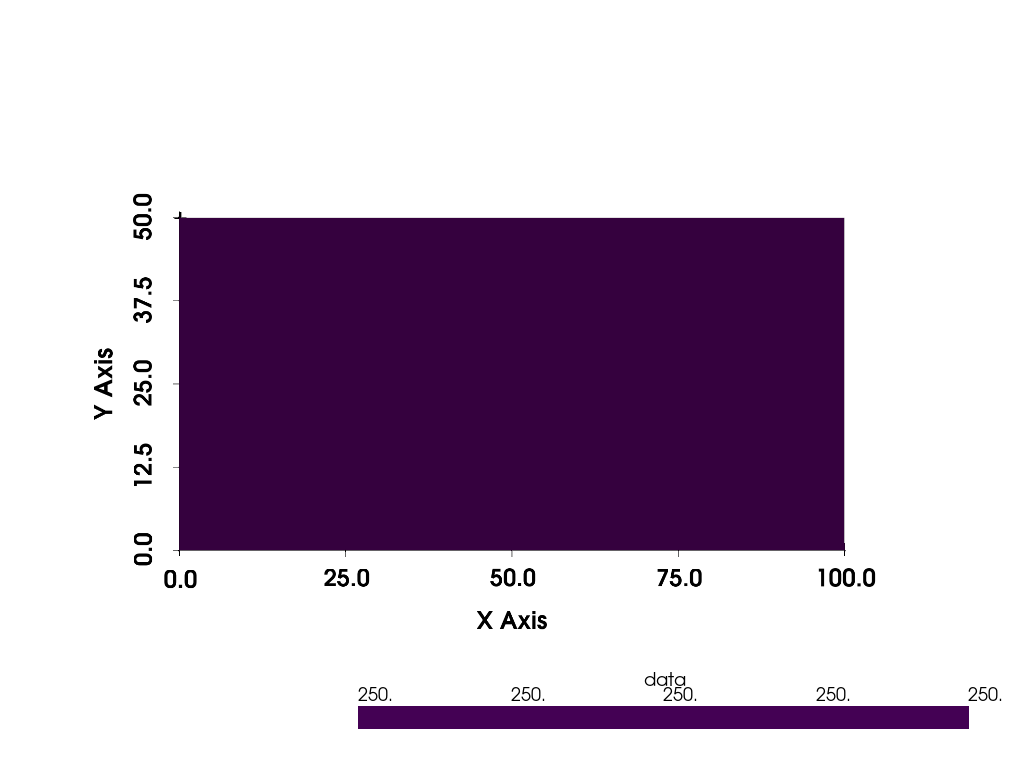

In [4]:
# Construct the water table
water_table = np.full((nx, ny), 250)

# Visualize the water table
app.visualizer.pv_plot_array(water_table)

# Update the settings
model_parameters['domain']['water_table'] = water_table

In [5]:
# Compute karst conduit networks
for mode in ['A', 'B', 'C', 'D']:
    model_parameters['sks']['mode'] = mode
    app.model.generate(model_parameters)

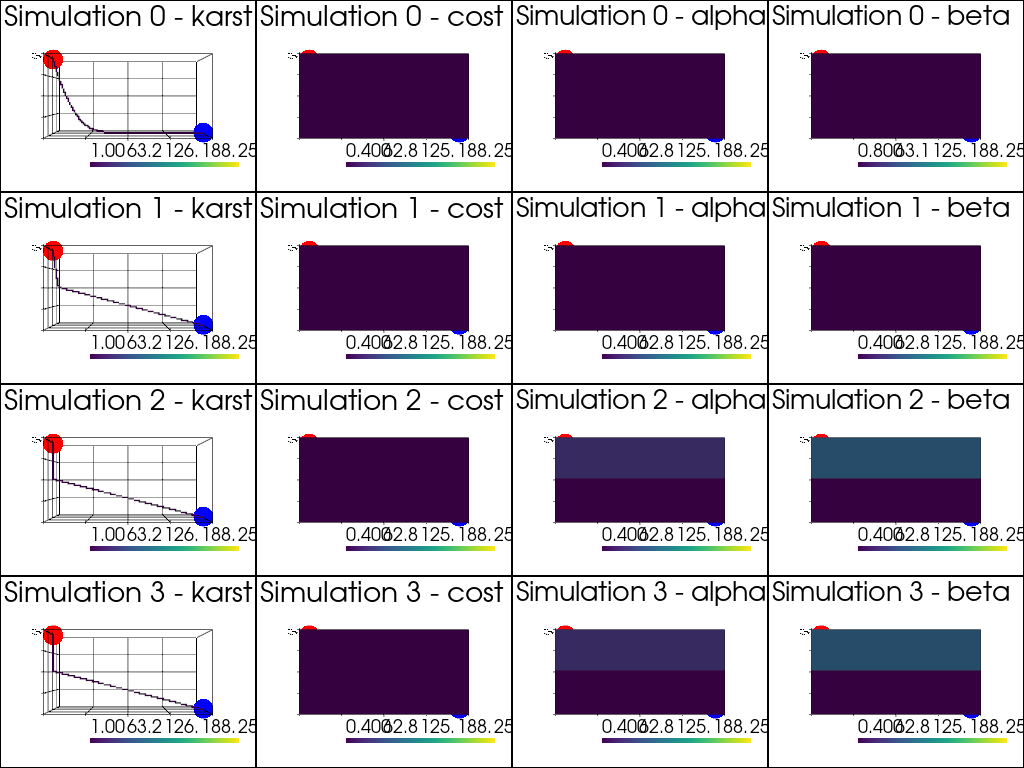

In [6]:
# Visualize the results
settings = {
    'ghost_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
    'surfaces_options' : {
        'water_table' : {},
    },
}
last_simulations = app.project.get_last_simulations(4)
app.visualizer.pv_show(simulations=last_simulations,
                       features=['karst', 'cost', 'alpha', 'beta'],
                       settings=settings)